In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive 

In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [9]:
import pandas as pd

In [10]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os

In [12]:
os.chdir('/content/drive/MyDrive/TriNIT/')

In [13]:
df = pd.read_csv('Crop_recommendation.csv')

In [14]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [15]:
labels = df['label'].values

In [16]:
np.unique(labels)

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [17]:
label_encoder = preprocessing.LabelEncoder()

In [18]:
df['label']= label_encoder.fit_transform(df['label'])

In [21]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [22]:
X = df.values[:, 0:-1]
Y = df.values[:, -1]

In [26]:
X = (X - X.mean(axis = 0)) / X.std(axis = 0)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [48]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units = 7, input_shape = [7], activation = 'relu'),
                                    tf.keras.layers.Dense(units = 64, activation = 'relu'),
                                    tf.keras.layers.Dense(units = 128, activation = 'relu'),
                                    tf.keras.layers.Dense(units = 22, activation = 'softmax')])

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 64)                512       
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 22)                2838      
                                                                 
Total params: 11,726
Trainable params: 11,726
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [51]:
history = model.fit(X_train, y_train, epochs = 300)

Epoch 1/300
55/55 [==============================] - 1s 3ms/step - loss: 3.1017 - accuracy: 0.0756
Epoch 2/300
55/55 [==============================] - 0s 3ms/step - loss: 3.0436 - accuracy: 0.1330
Epoch 3/300
55/55 [==============================] - 0s 3ms/step - loss: 2.9903 - accuracy: 0.1580
Epoch 4/300
55/55 [==============================] - 0s 3ms/step - loss: 2.9349 - accuracy: 0.1835
Epoch 5/300
55/55 [==============================] - 0s 3ms/step - loss: 2.8718 - accuracy: 0.1983
Epoch 6/300
55/55 [==============================] - 0s 3ms/step - loss: 2.7980 - accuracy: 0.2358
Epoch 7/300
55/55 [==============================] - 0s 3ms/step - loss: 2.7148 - accuracy: 0.2608
Epoch 8/300
55/55 [==============================] - 0s 3ms/step - loss: 2.6278 - accuracy: 0.2767
Epoch 9/300
55/55 [==============================] - 0s 2ms/step - loss: 2.5409 - accuracy: 0.2943
Epoch 10/300
55/55 [==============================] - 0s 2ms/step - loss: 2.4559 - accuracy: 0.3063
Epoch 11/

In [52]:
loss = history.history['loss']

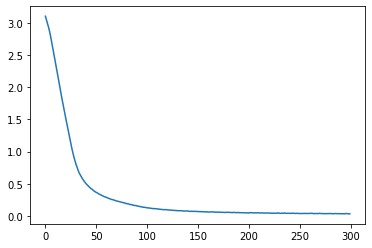

In [53]:
plt.plot(loss)

In [54]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9659


[0.08547088503837585, 0.9659090638160706]